# Use case - Customer Churn Prediction and Analysis

In [41]:
#Loding and importing all the required packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
from scipy import stats
from sklearn import preprocessing as prep
from sklearn.preprocessing import Imputer
import pylab as pl
plt.style.use('ggplot')
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
from scipy.spatial.distance import cdist
from sklearn import cluster
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime
from mlxtend.plotting import plot_confusion_matrix

### Loading dataset

In [42]:
file = 'BankCustomerChurnDataFeb19_Heavy.xlsx'

In [43]:
df = pd.read_excel(file, sheetname="BankCustomerData") 
print (df.shape)

(75000, 105)


## Data Pre-Processing

In [44]:
df.head()

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Min Bank transfer amount,Max Bank transfer amount,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Exited
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,7860,98270,8,13,3812,87054,1563,64159,Not Exited,0
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,8882,10115,7,12,4039,89501,5943,11346,Not Exited,0
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,4255,21758,8,10,5401,80590,8689,2520,Bad Service,1
3,4,10003,15000003,100003,Male,92,919,Insurance Companies,Canada,CAD,...,2290,87106,8,12,7507,96765,3082,94398,Not Exited,0
4,5,10004,15000004,100004,Male,57,1355,Broker,Canada,CAD,...,1261,39995,6,12,861,75362,3939,88392,Not Exited,0


## Loading Sentimental Analysis Score of the Customer

In [45]:
#file = 'BOACustomerSentimentScore.csv'
file = 'CustomerSentimentScoreData.xlsx'

In [46]:
#tweets_df = pd.read_csv(file) 
tweets_df = pd.read_excel(file, sheetname="SentimentScore") 
tweets_df.rename(columns={'CUSTOMER.CODE': 'CUSTOMER.CODE', 'SCORE': 'Sentimental.Score'}, inplace=True)
#tweets_df
#.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [47]:
tweets_df['Sentimental.Score'] = (tweets_df['Sentimental.Score']).astype(int) 
#tweets_df

## Merge the Original Dataframe with the Sentimental Score of Customer

In [48]:
#df['Sentimental.Score'] = df['Sentimental.Score'].round()
tweets_df['Sentimental.Score'].fillna(0, inplace=True)
#tweets_df

In [49]:
df = pd.merge(df, tweets_df, on='CUSTOMER.CODE', how='outer')
df.shape

(75000, 106)

In [50]:
df['Sentimental.Score'].fillna(0, inplace=True)
df

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Max Bank transfer amount,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Exited,Sentimental.Score
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,98270,8,13,3812,87054,1563,64159,Not Exited,0,5
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,10115,7,12,4039,89501,5943,11346,Not Exited,0,4
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,21758,8,10,5401,80590,8689,2520,Bad Service,1,3
3,4,10003,15000003,100003,Male,92,919,Insurance Companies,Canada,CAD,...,87106,8,12,7507,96765,3082,94398,Not Exited,0,-7
4,5,10004,15000004,100004,Male,57,1355,Broker,Canada,CAD,...,39995,6,12,861,75362,3939,88392,Not Exited,0,-6
5,6,10005,15000005,100005,Male,65,919,Broker,United States of America,USD,...,64320,5,11,1188,66667,1900,86720,Not Exited,0,8
6,7,10006,15000006,100006,Female,37,975,Central Banks,France,EUR,...,52934,6,15,2626,75167,1723,36516,Bad Service,1,2
7,8,10007,15000007,100007,Female,19,740,Retail Small/Med Enterprise,Canada,CAD,...,46515,4,14,5777,66971,1444,85818,Not Exited,0,10
8,9,10008,15000008,100008,Male,60,1378,Investment exchange - Margin,United States of America,USD,...,24562,5,10,4716,70931,3488,17309,Bad Service,1,-3
9,10,10009,15000009,100009,Female,40,528,***Corporate,France,EUR,...,63401,2,11,7585,44158,4450,38067,Not Exited,0,4


# Exploratory Data Analysis

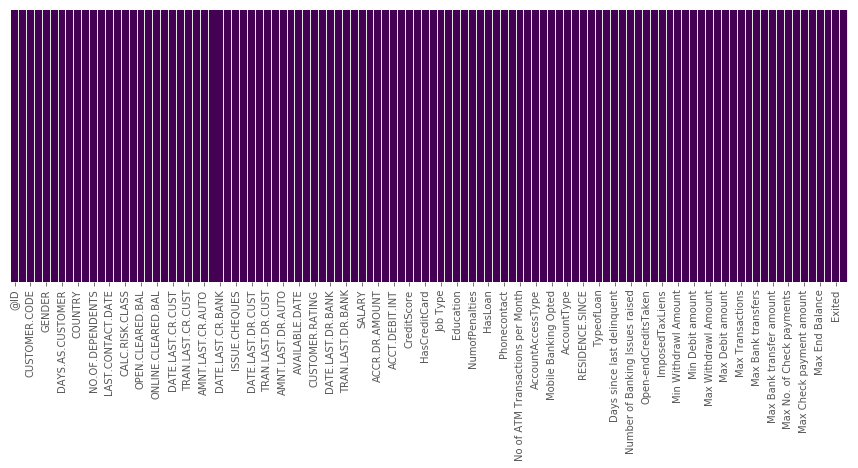

In [51]:
# Check for the Nulls in complete data.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("MissingData.png")
plt.show()
plt.clf()

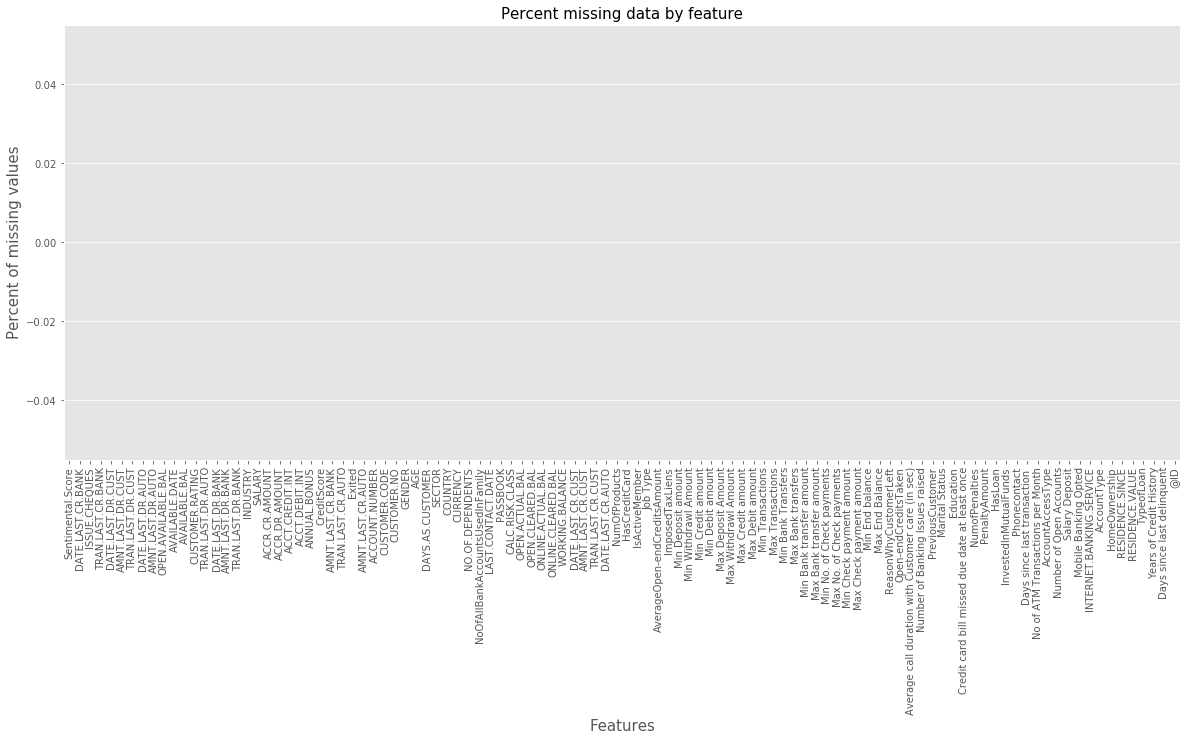

In [52]:
#Checking missing data - Show percentage of Missing Data in the complete Dataset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.savefig("PercentageMissingDataByFeature.png")
plt.show()
plt.clf()
#missing_data.head()

In [53]:
y_True = df["Exited"][df["Exited"] == 1]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["Exited"].shape[0]) * 100 ), '%') 

Churn Percentage = 29.801333333333336 %


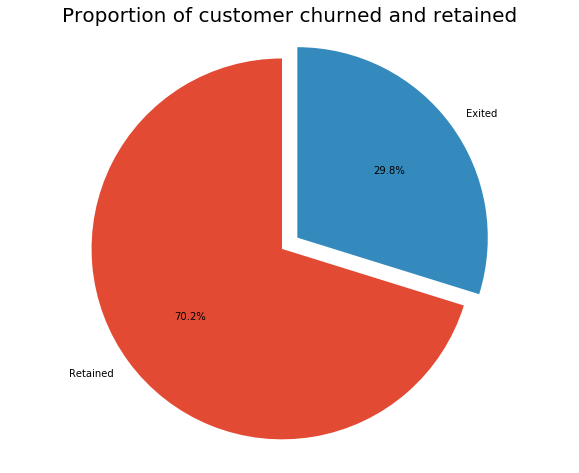

In [54]:
labels = 'Retained', 'Exited'
sizes = [df.Exited[df['Exited']==0].count(), df.Exited[df['Exited']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.savefig("Overall.png")
plt.show()
plt.clf()

In [55]:
#sentimental_df = tweets_df

In [56]:
def func(x):
    if x < -5:
        return "Worst"
    elif x < 0 and x > -5: 
        return "Bad"
    elif x == 0:
        return "Neutral"
    elif x > 0 and x < 3:
        return "Good"
    elif x > 3 and x < 5:
        return "Very Good"
    else:
        return 'Excellent'

df['Sentimental.Category'] = df['Sentimental.Score'].apply(func) 
df

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Exited,Sentimental.Score,Sentimental.Category
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,8,13,3812,87054,1563,64159,Not Exited,0,5,Excellent
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,7,12,4039,89501,5943,11346,Not Exited,0,4,Very Good
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,8,10,5401,80590,8689,2520,Bad Service,1,3,Excellent
3,4,10003,15000003,100003,Male,92,919,Insurance Companies,Canada,CAD,...,8,12,7507,96765,3082,94398,Not Exited,0,-7,Worst
4,5,10004,15000004,100004,Male,57,1355,Broker,Canada,CAD,...,6,12,861,75362,3939,88392,Not Exited,0,-6,Worst
5,6,10005,15000005,100005,Male,65,919,Broker,United States of America,USD,...,5,11,1188,66667,1900,86720,Not Exited,0,8,Excellent
6,7,10006,15000006,100006,Female,37,975,Central Banks,France,EUR,...,6,15,2626,75167,1723,36516,Bad Service,1,2,Good
7,8,10007,15000007,100007,Female,19,740,Retail Small/Med Enterprise,Canada,CAD,...,4,14,5777,66971,1444,85818,Not Exited,0,10,Excellent
8,9,10008,15000008,100008,Male,60,1378,Investment exchange - Margin,United States of America,USD,...,5,10,4716,70931,3488,17309,Bad Service,1,-3,Bad
9,10,10009,15000009,100009,Female,40,528,***Corporate,France,EUR,...,2,11,7585,44158,4450,38067,Not Exited,0,4,Very Good


In [57]:
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

In [58]:
df = change_column_order(df, 'Exited', len(df.columns)-1)
df

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Sentimental.Score,Sentimental.Category,Exited
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,8,13,3812,87054,1563,64159,Not Exited,5,Excellent,0
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,7,12,4039,89501,5943,11346,Not Exited,4,Very Good,0
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,8,10,5401,80590,8689,2520,Bad Service,3,Excellent,1
3,4,10003,15000003,100003,Male,92,919,Insurance Companies,Canada,CAD,...,8,12,7507,96765,3082,94398,Not Exited,-7,Worst,0
4,5,10004,15000004,100004,Male,57,1355,Broker,Canada,CAD,...,6,12,861,75362,3939,88392,Not Exited,-6,Worst,0
5,6,10005,15000005,100005,Male,65,919,Broker,United States of America,USD,...,5,11,1188,66667,1900,86720,Not Exited,8,Excellent,0
6,7,10006,15000006,100006,Female,37,975,Central Banks,France,EUR,...,6,15,2626,75167,1723,36516,Bad Service,2,Good,1
7,8,10007,15000007,100007,Female,19,740,Retail Small/Med Enterprise,Canada,CAD,...,4,14,5777,66971,1444,85818,Not Exited,10,Excellent,0
8,9,10008,15000008,100008,Male,60,1378,Investment exchange - Margin,United States of America,USD,...,5,10,4716,70931,3488,17309,Bad Service,-3,Bad,1
9,10,10009,15000009,100009,Female,40,528,***Corporate,France,EUR,...,2,11,7585,44158,4450,38067,Not Exited,4,Very Good,0


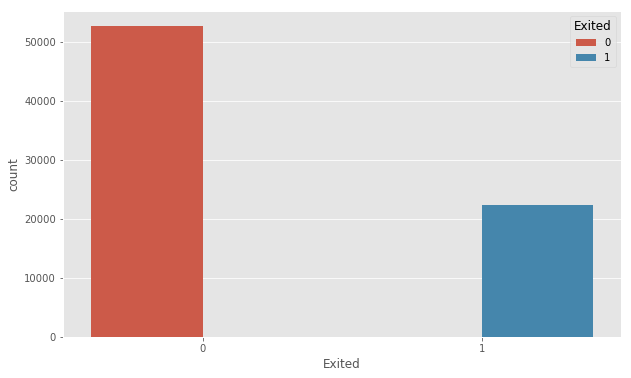

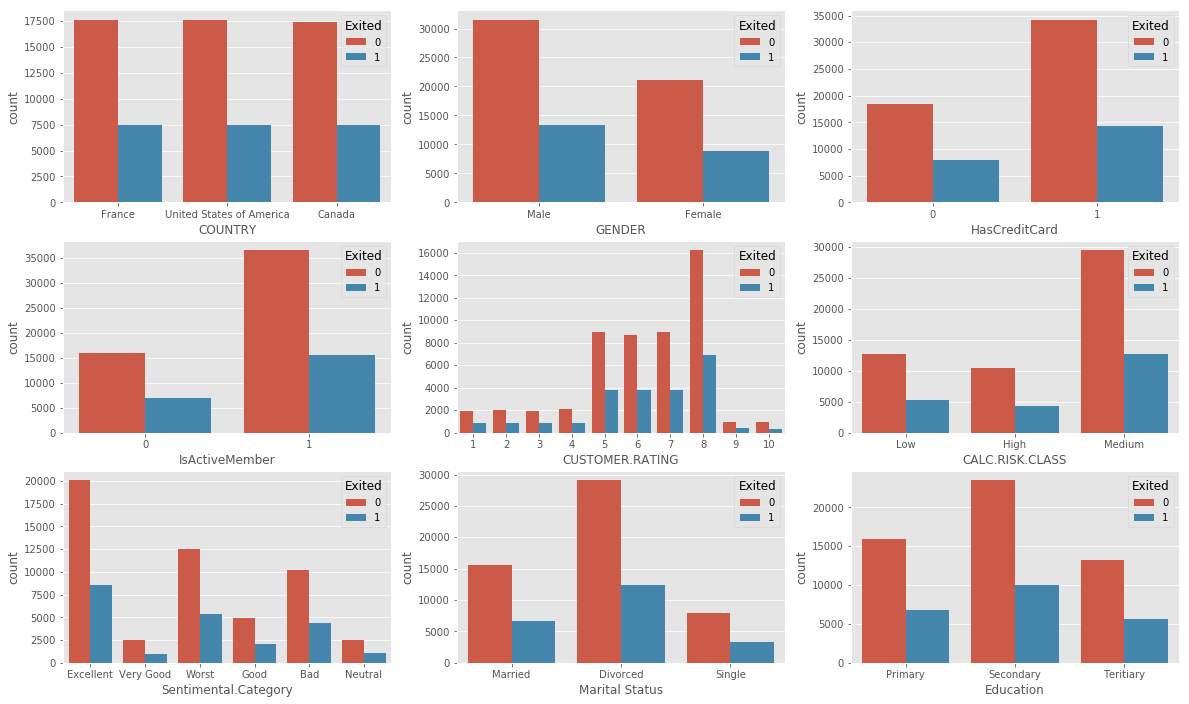

In [59]:
# We first review the 'Status' relation with categorical variables
fig1, axarr1 = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(x='Exited', hue = 'Exited',data = df, ax=axarr1)
fig, axarr = plt.subplots(3, 3, figsize=(20, 12))
sns.countplot(x='COUNTRY', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='GENDER', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCreditCard', hue = 'Exited',data = df, ax=axarr[0][2])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='CUSTOMER.RATING', hue = 'Exited',data = df, ax=axarr[1][1])
sns.countplot(x='CALC.RISK.CLASS', hue = 'Exited',data = df, ax=axarr[1][2])
sns.countplot(x='Sentimental.Category', hue = 'Exited',data = df, ax=axarr[2][0])
sns.countplot(x='Marital Status', hue = 'Exited',data = df, ax=axarr[2][1])
sns.countplot(x='Education', hue = 'Exited',data = df, ax=axarr[2][2])
plt.savefig("ChurnBasedOnCategories_1.png")
plt.show()
plt.clf()

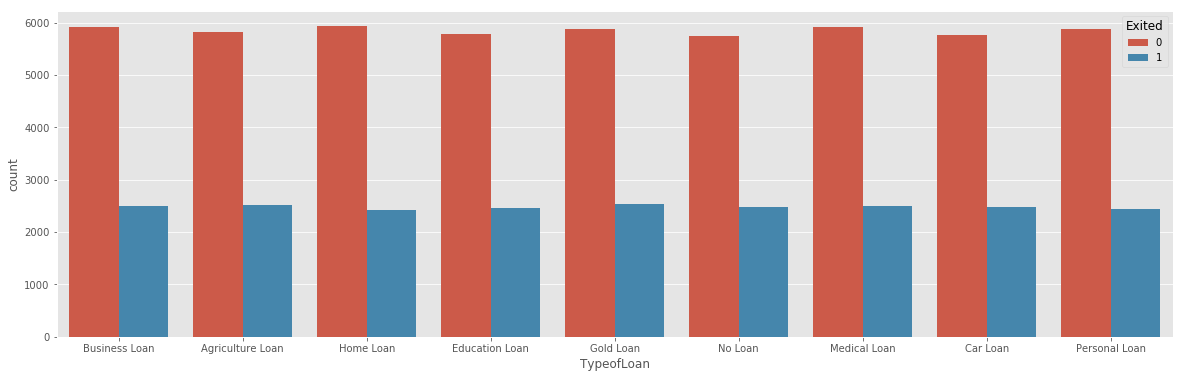

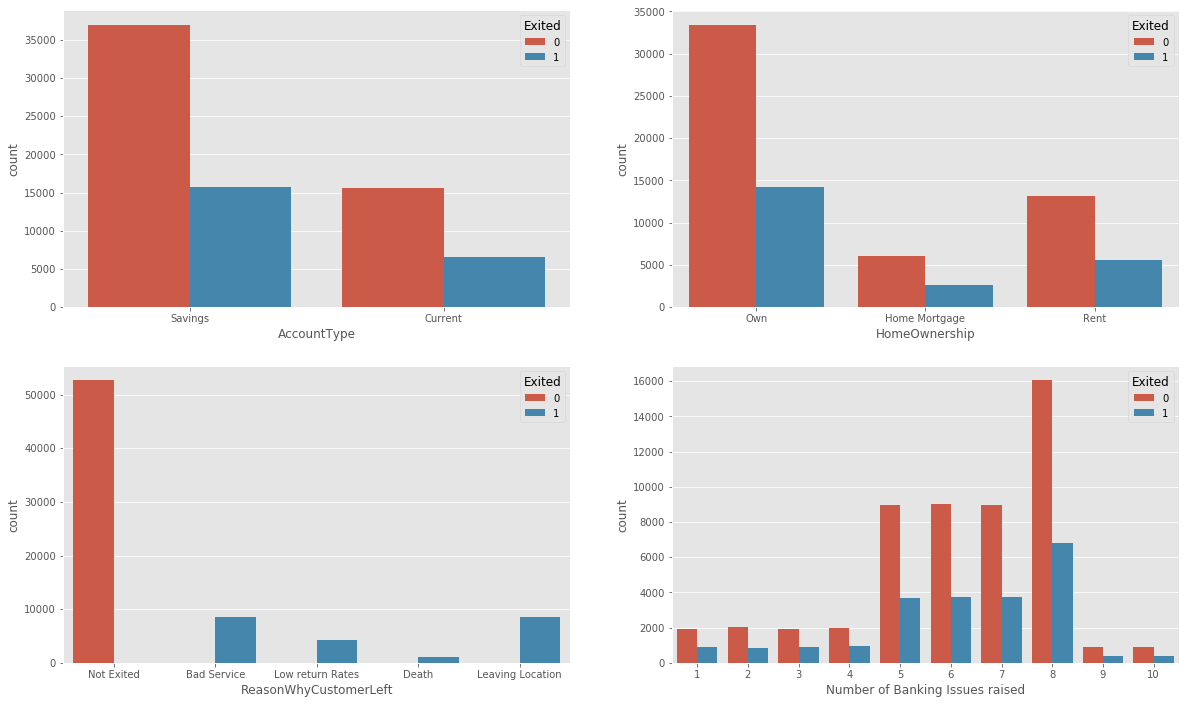

In [60]:
# We first review the 'Status' relation with categorical variables
fig1, axarr1 = plt.subplots(1, 1, figsize=(20, 6))
sns.countplot(x='TypeofLoan', hue = 'Exited',data = df, ax=axarr1)
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='AccountType', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='HomeOwnership', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='ReasonWhyCustomerLeft', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='Number of Banking Issues raised', hue = 'Exited',data = df, ax=axarr[1][1])
plt.savefig("ChurnBasedOnCategories_2.png")
plt.show()

In [61]:
#_, ax = plt.subplots(1, 3, figsize=(18, 6))
#plt.subplots_adjust(wspace=0.3)
#sns.swarmplot(x = "NumOfProducts", y = "AGE", hue="Exited", data = df, ax= ax[0])
#sns.swarmplot(x = "HasCrCard", y = "AGE", data = df, hue="Exited", ax = ax[1])
#sns.swarmplot(x = "IsActiveMember", y = "AGE", hue="Exited", data = df, ax = ax[2])

In [62]:
churn     = df[df["Exited"] == 1]
not_churn = df[df["Exited"] == 0]

In [63]:
import plotly.offline as py#visualization
#py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [ ]:

#function  for pie plot for customer attrition types
def plot_pie(column) :
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")),
                    hole    = .6)
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers")


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5)]))
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    #py.iplot(fig)
    py.plot(fig, filename=column, image='png')

    
object_cols = df.select_dtypes(include=['object']).copy()   
#for all categorical columns plot pie
for i in object_cols :
    plot_pie(i)

In [ ]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    #py.iplot(fig)
    py.plot(fig, filename=column, image='png')


g=df.select_dtypes(include=['int64','int32','float64']).copy()
g.drop(['CUSTOMER.CODE','@ID','ACCOUNT.NUMBER','CUSTOMER.NO','LAST.CONTACT.DATE','Exited','DATE.LAST.CR.CUST','DATE.LAST.CR.AUTO','DATE.LAST.CR.BANK','DATE.LAST.DR.CUST',
        'DATE.LAST.DR.AUTO','AVAILABLE.DATE','DATE.LAST.DR.BANK','RESIDENCE.SINCE'], axis = 1, inplace=True)
#num_cols   = [x for x in g.columns if x not in object_cols + target_col + Id_col]
#for all categorical columns plot histogram    
for i in g :
    histogram(i)

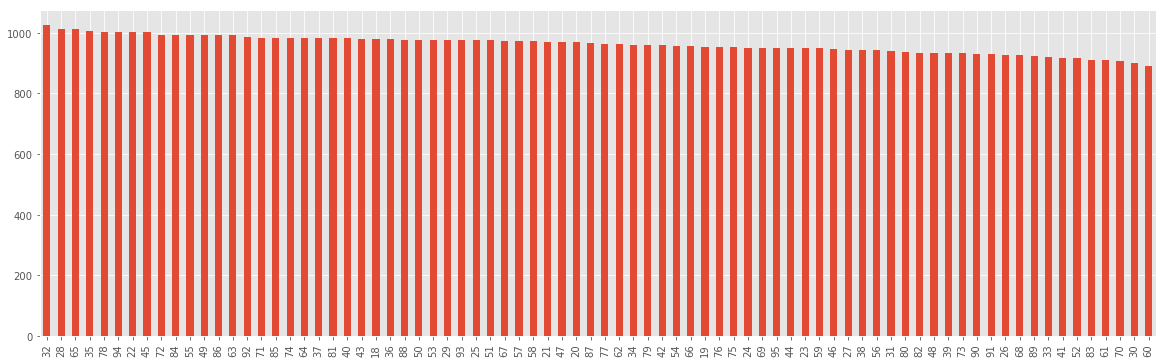

In [64]:
df[['AGE']]=df[['AGE']].astype(int)
AgeDf=df.sort_values(by='AGE')
AgeDf["AGE"].value_counts().plot.bar(figsize=(20,6))
plt.savefig("AgeDistributionByChurn_BarChart.png")
plt.show()
plt.clf()


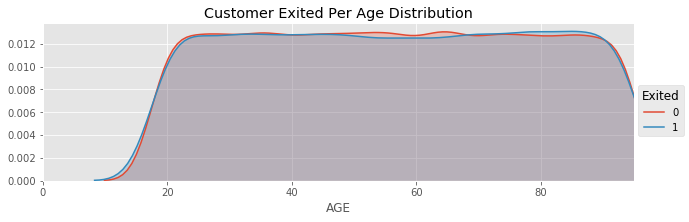

In [65]:
# Check Age Distribution w.r.t Exited (Dependent Variable)
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"AGE",shade= True)
facet.set(xlim=(0, df["AGE"].max()))
facet.add_legend()
plt.title('Customer Exited Per Age Distribution')
plt.savefig("AgeDistributionByChurn_AreaDistribution.png")
plt.show()
plt.clf()

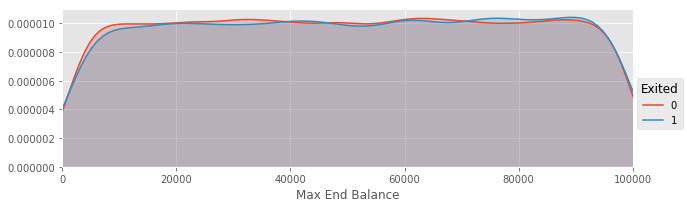

In [66]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Max End Balance",shade= True)
facet.set(xlim=(0, df["Max End Balance"].max()))
facet.add_legend()
plt.show()
plt.clf()

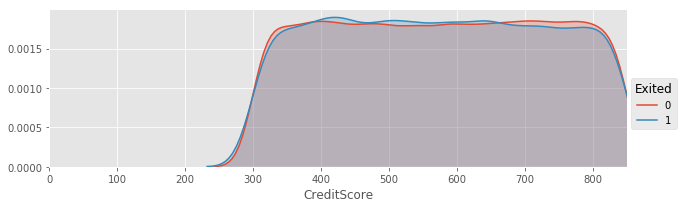

In [67]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, df["CreditScore"].max()))
facet.add_legend()
plt.show()

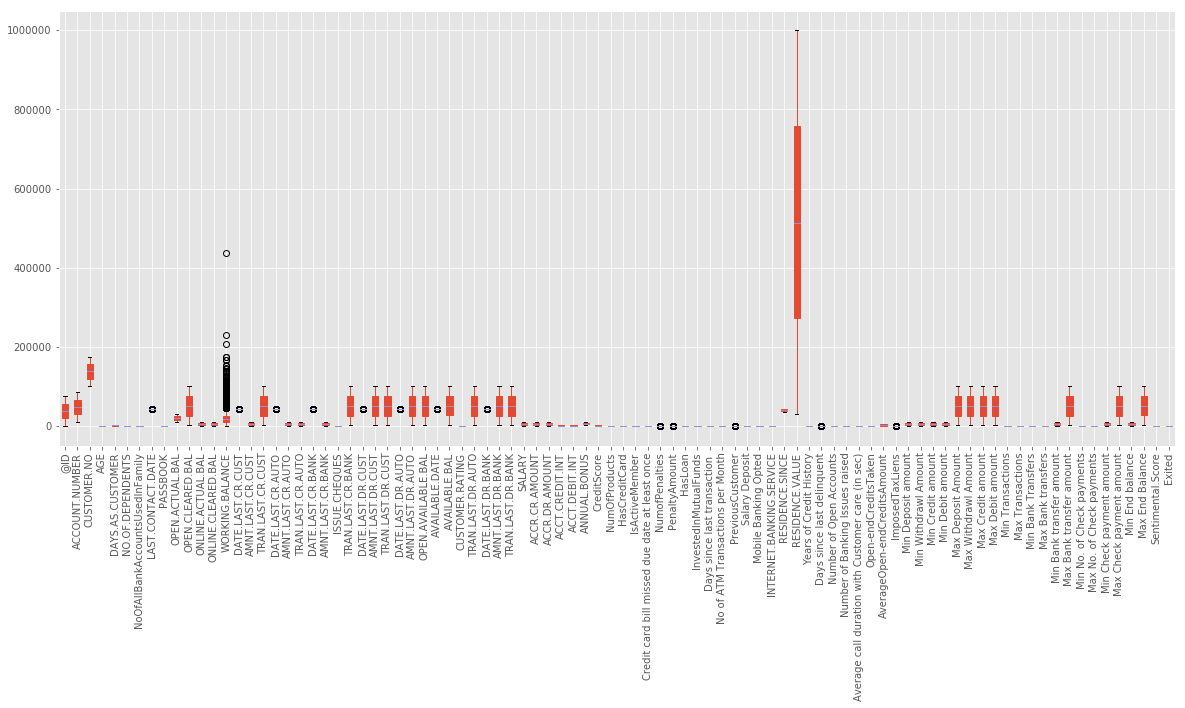

In [68]:
Boxdf=df.copy()
Boxdf.drop(["CUSTOMER.CODE"], axis = 1, inplace=True) 
plt.figure(figsize=(20,8))
bplot = Boxdf.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.savefig('OutliersInData.png')
plt.show()
plt.clf()

In [69]:
Positive_Sentiments = df['Sentimental.Score'][df['Sentimental.Score'] > 0].count()
Negative_Sentiments = df['Sentimental.Score'][df['Sentimental.Score'] < 0].count()
Neutral_Sentiments = df['Sentimental.Score'][df['Sentimental.Score'] == 0].count()
print('Positive_Sentiments : ', Positive_Sentiments)
print('Negative_Sentiments : ', Negative_Sentiments)
print('Neutral_Sentiments : ', Neutral_Sentiments)

Positive_Sentiments :  35599
Negative_Sentiments :  35872
Neutral_Sentiments :  3529


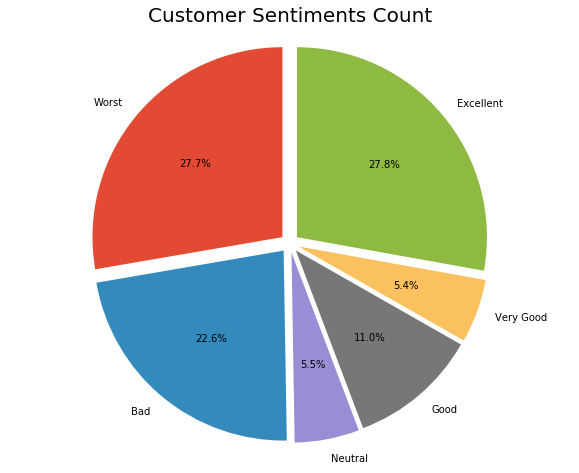

In [70]:
labels = 'Worst', 'Bad', 'Neutral', 'Good', 'Very Good', 'Excellent'
sizes = [df['Sentimental.Score'][df['Sentimental.Score'] <- 5].count(), 
         df['Sentimental.Score'][(df['Sentimental.Score'] > - 5) & (df['Sentimental.Score'] < 0)].count(),
         df['Sentimental.Score'][df['Sentimental.Score'] == 0].count(),
         df['Sentimental.Score'][(df['Sentimental.Score'] > 0) & (df['Sentimental.Score'] < 3)].count(),
         df['Sentimental.Score'][(df['Sentimental.Score'] > 3) & (df['Sentimental.Score'] < 5)].count(),
         df['Sentimental.Score'][df['Sentimental.Score'] > 5].count()]

explode = (0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Customer Sentiments Count", size = 20)
plt.savefig("4.png")
plt.show()
plt.clf()

In [71]:
df.drop(["ReasonWhyCustomerLeft","Sentimental.Category"], axis = 1, inplace=True) 

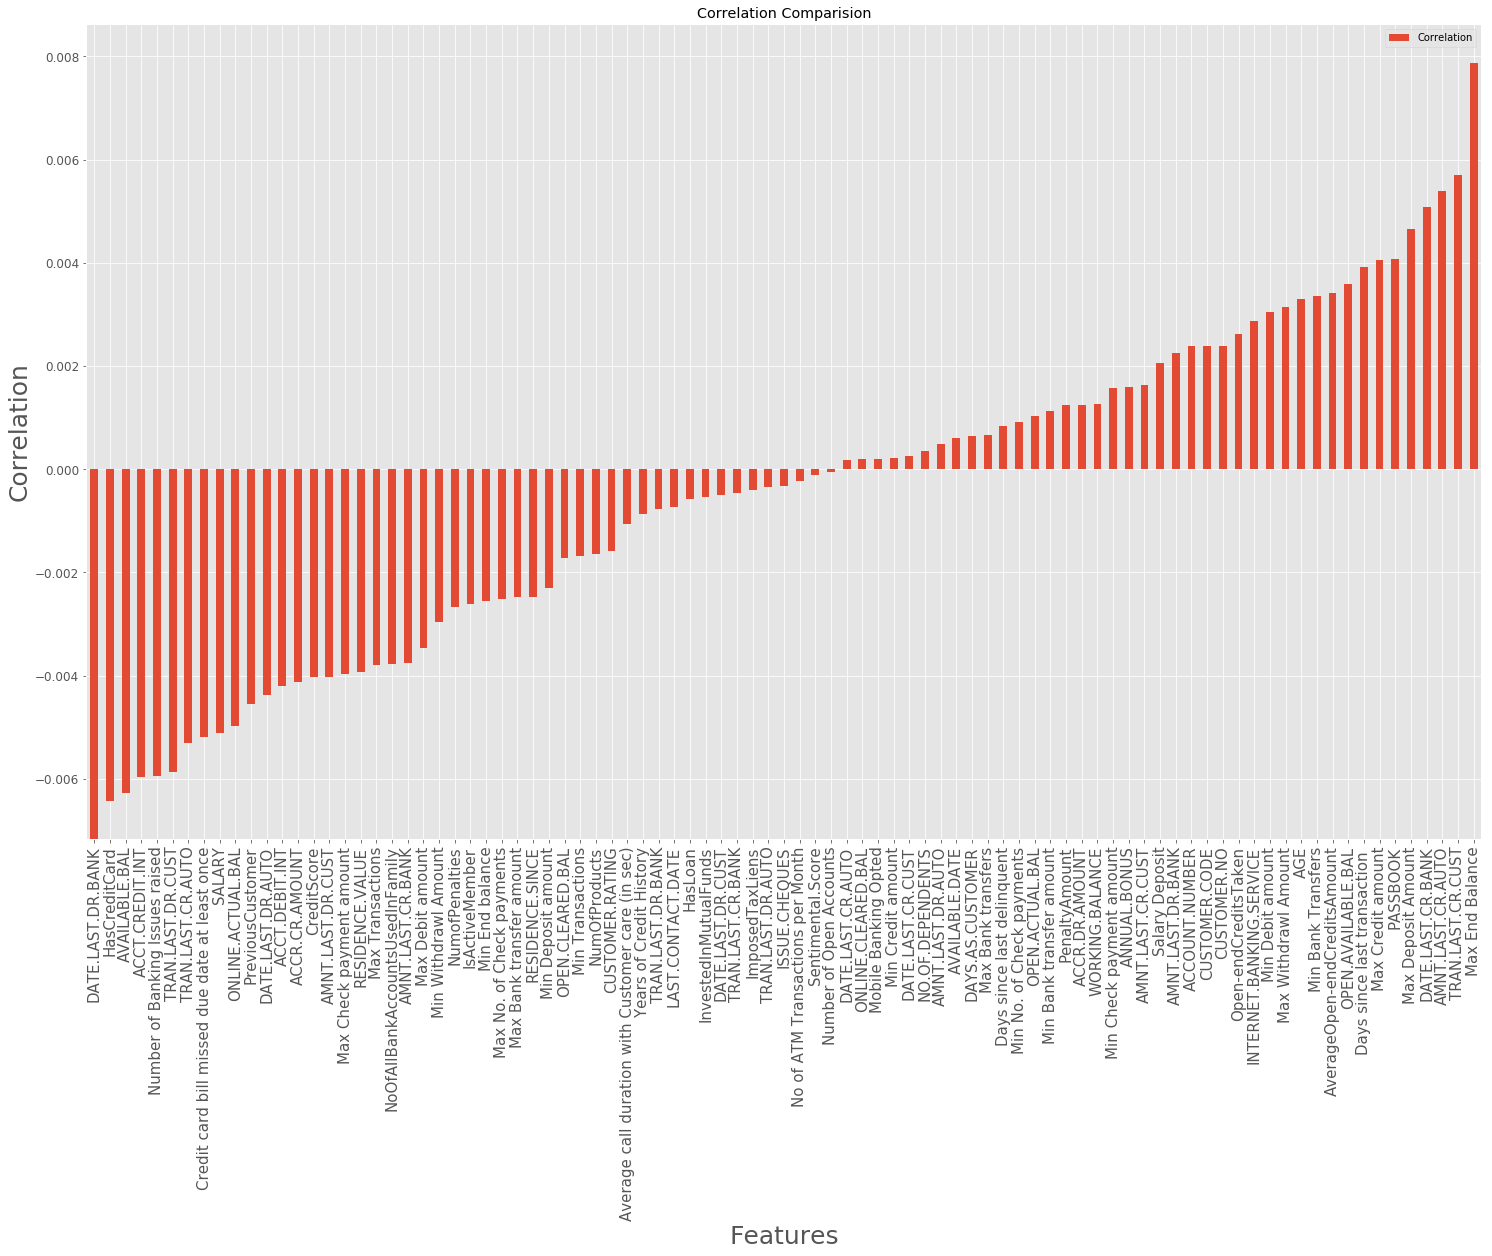

In [72]:
Correlationdf=df[df.columns[1:]].corr()['Exited'][:-1]
#Correlationdf=Correlationdf.frame(row=rownames(Correlationdf)[row(Correlationdf)], col=colnames(Correlationdf)[col(Correlationdf)], corr=c(Correlationdf))
Correlationdf=pd.DataFrame({'Features':Correlationdf.index, 'Correlation':Correlationdf.values})
Correlationdf=Correlationdf.sort_values(by='Correlation')
#print(Correlationdf)

Correlationdf = Correlationdf[Correlationdf.Features != 'Exited']
correlationvalues = Correlationdf.Correlation
my_colors = 'rgbkymc'
ax = Correlationdf.plot(kind='bar', title ="Correlation Comparision", figsize=(25, 15), legend=True, fontsize=12)
ax.set_xlabel("Features", fontsize=25)
ax.set_ylabel("Correlation", fontsize=25)
ax.set_xticklabels(Correlationdf.Features,fontsize=15)
plt.savefig("CorrelationOfFeaturesWithOutput.png")
fig =plt.show()